# 1. Data Exploration & Analysis

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

path = "../data/Task_Data_Scientist_Dataset.xlsx"
dfs = pd.read_excel(path, sheet_name=None)

soc = dfs['Soc_Dem']
products = dfs['Products_ActBalance']
inflow = dfs['Inflow_Outflow']
sales = dfs['Sales_Revenues']

df = soc.merge(products, on="Client", how="left") \
        .merge(inflow, on="Client", how="left") \
        .merge(sales, on="Client", how="left")

df.head()

,Client,Sex,Age,Tenure,Unnamed: 4,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,909,M,21,27,7.250000,1,NaN,NaN,1.0,NaN,1.0,4.710714,NaN,NaN,0.0,NaN,4291.996429,789.129643,738.230000,4.0,3.0,450.678571,448.892857,178.571429,0.0000,166.571429,8.0,7.0,1.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1217,M,38,165,34.333333,1,NaN,NaN,NaN,NaN,NaN,6752.244643,NaN,NaN,NaN,NaN,NaN,0.002143,0.002143,1.0,1.0,714.285714,714.285714,0.000000,0.0000,714.285714,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,850,F,49,44,46.166667,1,NaN,NaN,NaN,NaN,NaN,43.523214,NaN,NaN,NaN,NaN,NaN,1392.402857,1392.402857,3.0,3.0,1226.345357,1226.345357,0.000000,0.0000,121.928571,6.0,6.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.893929,0.0
3,1473,M,54,34,45.166667,1,1.0,NaN,NaN,1.0,1.0,29.024286,14447.801429,NaN,NaN,653.91,1132.590357,1787.127500,939.128929,14.0,5.0,3875.137857,3794.580714,357.142857,444.5975,2076.785714,48.0,38.0,1.0,26.0,11.0,1.0,0.0,0.0,4.929643,0.000000,0.0
4,1038,M,29,106,13.416667,1,NaN,NaN,NaN,NaN,NaN,27.035714,NaN,NaN,NaN,NaN,NaN,0.006071,0.006071,1.0,1.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [2]:
print("Shape (rows, columns):", df.shape)

print("Number of unique Clients:", df['Client'].nunique())
print("Number of rows:", len(df))
if df['Client'].nunique() == len(df):
    print("1 row = 1 client (no duplicates)")
else:
    print("Duplicated clients detected, needs checking")

missing = df.isna().sum()
print("\nMissing values by column (top-10):")
print(missing[missing > 0].sort_values(ascending=False).head(10))

total_missing_pct = df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100
print(f"\nOverall % of missing values: {total_missing_pct:.2f}%")

print("\nDescriptive statistics:")
print(df.describe().T.head(10))

Shape (rows, columns): (1615, 37)
Number of unique Clients: 1615
Number of rows: 1615
1 row = 1 client (no duplicates)

Missing values by column (top-10):
ActBal_CL     1480
Count_CL      1480
Count_CC      1445
ActBal_CC     1445
Count_MF      1309
ActBal_MF     1309
Count_OVD     1196
ActBal_OVD    1196
ActBal_SA     1189
Count_SA      1189
dtype: int64

Overall % of missing values: 29.30%

Descriptive statistics:
             count        mean         std   min         25%         50%  \
Client      1615.0  808.000000  466.354658   1.0  404.500000  808.000000   
Age         1615.0   42.848916   18.550529   0.0   29.000000   41.000000   
Tenure      1615.0  101.339938   64.917297   0.0   44.000000   97.000000   
Unnamed: 4  1615.0   34.405315   19.499807 -19.0   19.833333   32.916667   
Count_CA    1615.0    1.078638    0.333035   1.0    1.000000    1.000000   
Count_SA     426.0    1.166667    0.468205   1.0    1.000000    1.000000   
Count_MF     306.0    4.676471    7.845009   1.0

In [3]:
df = df.drop(columns=['Unnamed: 4'])

In [4]:
na_cols = df.columns[df.isna().any()].tolist()

print("Columns with missing values:")
for col in na_cols:
    print(f"{col}: {df[col].isna().sum()} missing")

Columns with missing values:
Sex: 3 missing
Count_SA: 1189 missing
Count_MF: 1309 missing
Count_OVD: 1196 missing
Count_CC: 1445 missing
Count_CL: 1480 missing
ActBal_SA: 1189 missing
ActBal_MF: 1309 missing
ActBal_OVD: 1196 missing
ActBal_CC: 1445 missing
ActBal_CL: 1480 missing
VolumeCred: 28 missing
VolumeCred_CA: 28 missing
TransactionsCred: 28 missing
TransactionsCred_CA: 28 missing
VolumeDeb: 28 missing
VolumeDeb_CA: 28 missing
VolumeDebCash_Card: 28 missing
VolumeDebCashless_Card: 28 missing
VolumeDeb_PaymentOrder: 28 missing
TransactionsDeb: 28 missing
TransactionsDeb_CA: 28 missing
TransactionsDebCash_Card: 28 missing
TransactionsDebCashless_Card: 28 missing
TransactionsDeb_PaymentOrder: 28 missing
Sale_MF: 646 missing
Sale_CC: 646 missing
Sale_CL: 646 missing
Revenue_MF: 646 missing
Revenue_CC: 646 missing
Revenue_CL: 646 missing


In [5]:
df.loc[df['Age'] == 0, 'Age'] = df['Age'].median()

df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

prod_cols = [c for c in df.columns if c.startswith('Count_') or c.startswith('ActBal_')]
df[prod_cols] = df[prod_cols].fillna(0)

# Volume / Transactions -> NaN = 0
cols_zero = [c for c in df.columns if c.startswith('Volume') or c.startswith('Transactions')]
df[cols_zero] = df[cols_zero].fillna(0)

In [6]:
print("Columns with missing values:")
for col in na_cols:
    print(f"{col}: {df[col].isna().sum()} missing")

Columns with missing values:
Sex: 0 missing
Count_SA: 0 missing
Count_MF: 0 missing
Count_OVD: 0 missing
Count_CC: 0 missing
Count_CL: 0 missing
ActBal_SA: 0 missing
ActBal_MF: 0 missing
ActBal_OVD: 0 missing
ActBal_CC: 0 missing
ActBal_CL: 0 missing
VolumeCred: 0 missing
VolumeCred_CA: 0 missing
TransactionsCred: 0 missing
TransactionsCred_CA: 0 missing
VolumeDeb: 0 missing
VolumeDeb_CA: 0 missing
VolumeDebCash_Card: 0 missing
VolumeDebCashless_Card: 0 missing
VolumeDeb_PaymentOrder: 0 missing
TransactionsDeb: 0 missing
TransactionsDeb_CA: 0 missing
TransactionsDebCash_Card: 0 missing
TransactionsDebCashless_Card: 0 missing
TransactionsDeb_PaymentOrder: 0 missing
Sale_MF: 646 missing
Sale_CC: 646 missing
Sale_CL: 646 missing
Revenue_MF: 646 missing
Revenue_CC: 646 missing
Revenue_CL: 646 missing


In [7]:
df = pd.get_dummies(df, columns = ['Sex'], drop_first = True)
df['Sex_M'] = df['Sex_M'].astype(int)

In [8]:
df.head(20)

,Client,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex_M
0,909,21,27,1,0.0,0.0,1.0,0.0,1.0,4.710714,0.000000,0.000000,0.0000,0.000000,4291.996429,789.129643,738.230000,4.0,3.0,450.678571,448.892857,178.571429,0.000000,166.571429,8.0,7.0,1.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1217,38,165,1,0.0,0.0,0.0,0.0,0.0,6752.244643,0.000000,0.000000,0.0000,0.000000,0.000000,0.002143,0.002143,1.0,1.0,714.285714,714.285714,0.000000,0.000000,714.285714,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1
2,850,49,44,1,0.0,0.0,0.0,0.0,0.0,43.523214,0.000000,0.000000,0.0000,0.000000,0.000000,1392.402857,1392.402857,3.0,3.0,1226.345357,1226.345357,0.000000,0.000000,121.928571,6.0,6.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.893929,0.000000,0
3,1473,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,14447.801429,0.000000,0.0000,653.910000,1132.590357,1787.127500,939.128929,14.0,5.0,3875.137857,3794.580714,357.142857,444.597500,2076.785714,48.0,38.0,1.0,26.0,11.0,1.0,0.0,0.0,4.929643,0.000000,0.000000,1
4,1038,29,106,1,0.0,0.0,0.0,0.0,0.0,27.035714,0.000000,0.000000,0.0000,0.000000,0.000000,0.006071,0.006071,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1
5,225,14,187,1,0.0,0.0,1.0,0.0,0.0,345.686071,0.000000,0.000000,618.3975,0.000000,0.000000,0.007500,0.007500,1.0,1.0,130.521429,130.521429,0.000000,111.235714,19.285714,5.0,5.0,0.0,4.0,1.0,0.0,0.0,1.0,0.000000,0.000000,8.130714,1
6,699,37,175,1,0.0,4.0,1.0,0.0,0.0,1823.057143,0.000000,18491.444286,0.0000,0.000000,0.000000,1033.496071,778.370000,8.0,6.0,661.483214,566.126071,89.285714,0.000000,216.892857,13.0,10.0,2.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1
7,827,57,50,1,0.0,0.0,1.0,1.0,0.0,49.193571,0.000000,0.000000,0.0000,0.464286,0.000000,1755.281786,1750.404286,9.0,6.0,1474.321429,1455.035714,607.142857,17.857143,843.250000,26.0,23.0,4.0,1.0,17.0,0.0,1.0,1.0,0.000000,7.928571,12.242143,1
8,1231,6,232,1,0.0,0.0,0.0,0.0,0.0,819.853929,0.000000,0.000000,0.0000,0.000000,0.000000,0.015714,0.015714,2.0,2.0,2257.000000,2257.000000,2250.000000,0.000000,0.000000,9.0,9.0,6.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,24.434643,0
9,528,19,70,1,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,435.682143,435.682143,2.0,2.0,390.056429,390.056429,125.000000,70.842143,190.821429,10.0,10.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0


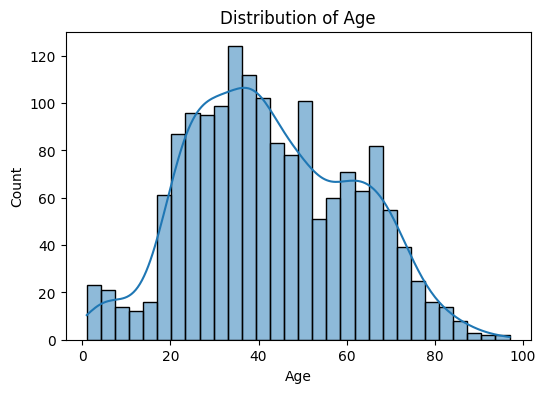

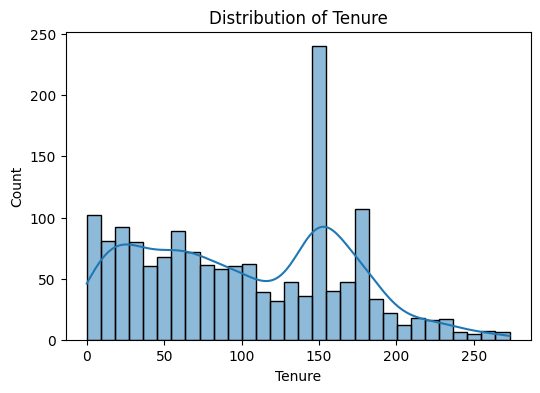

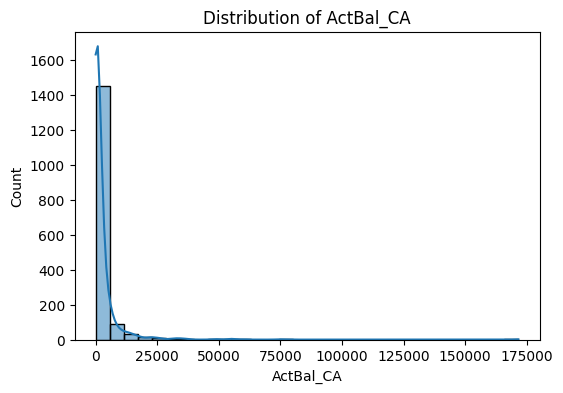

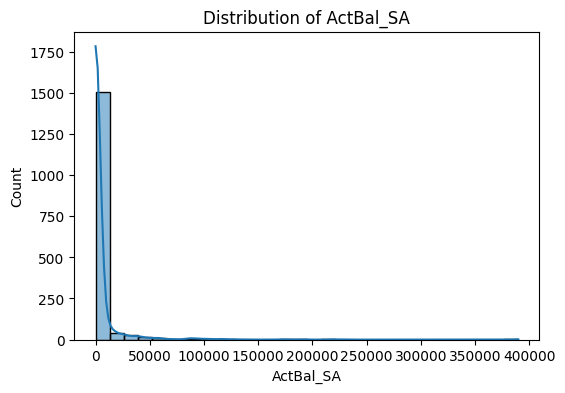

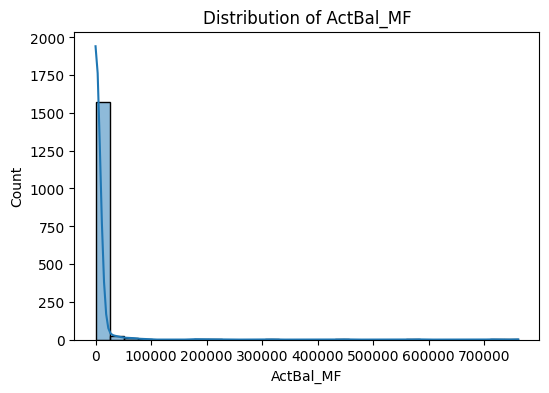

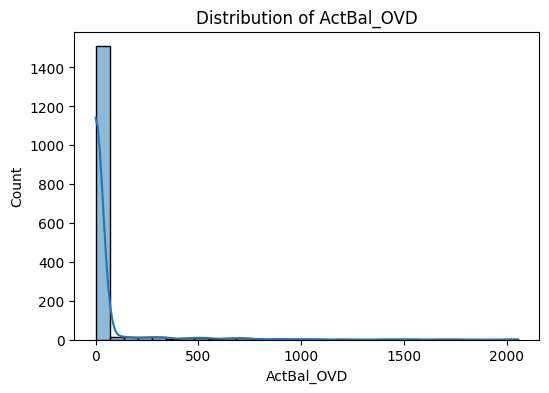

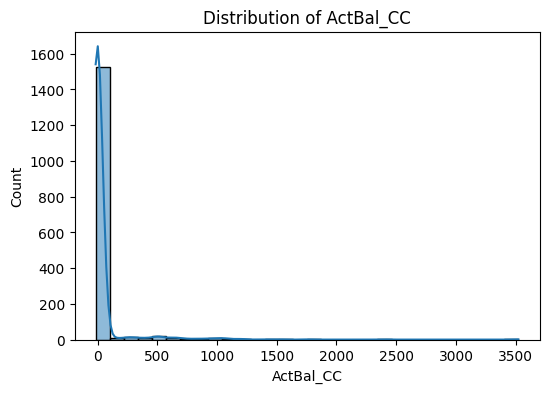

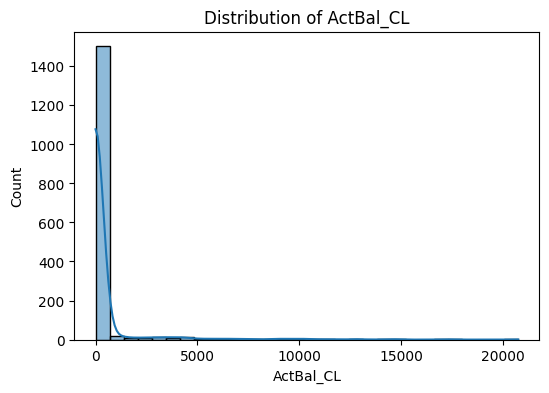

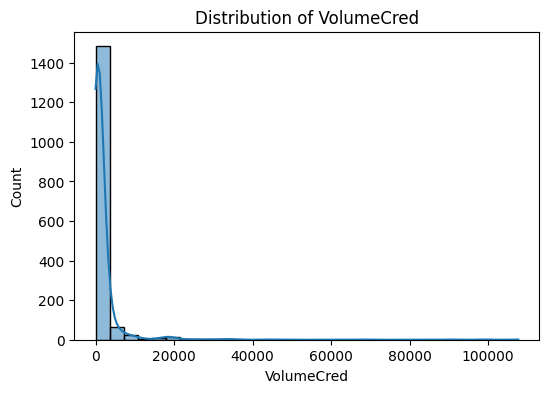

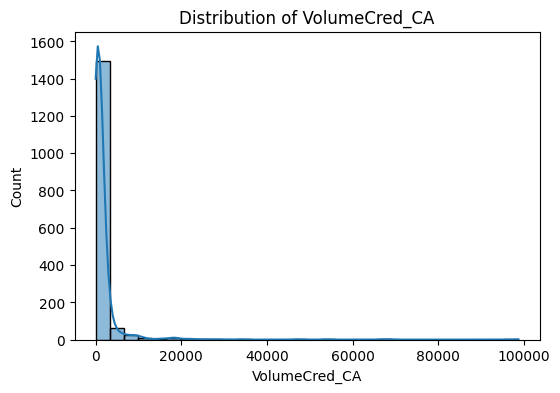

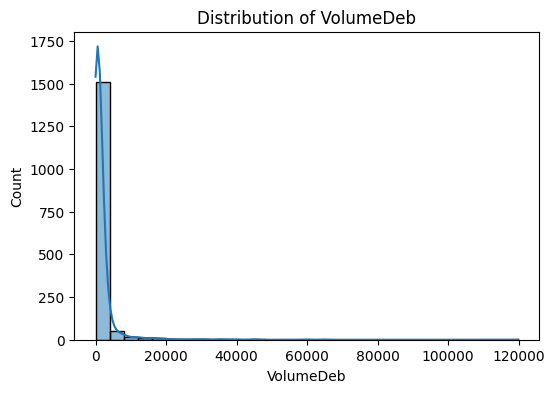

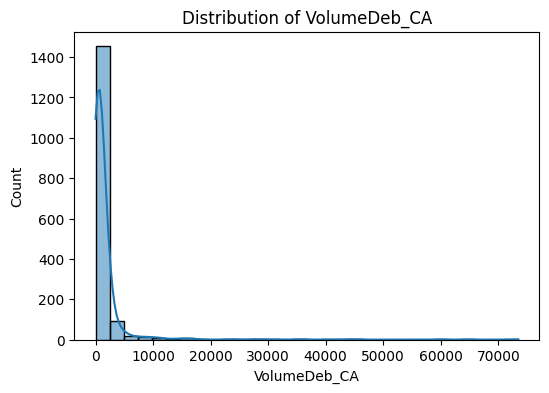

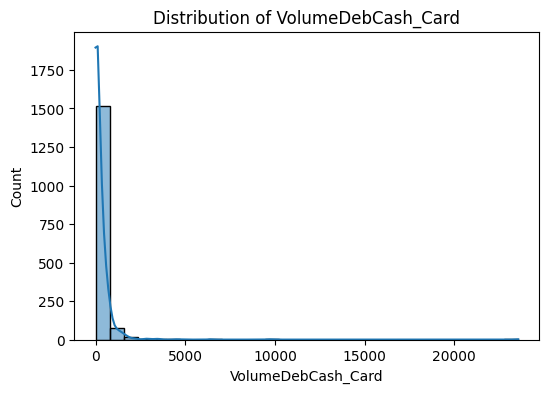

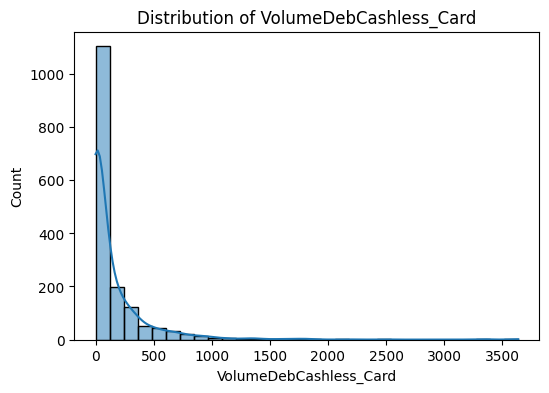

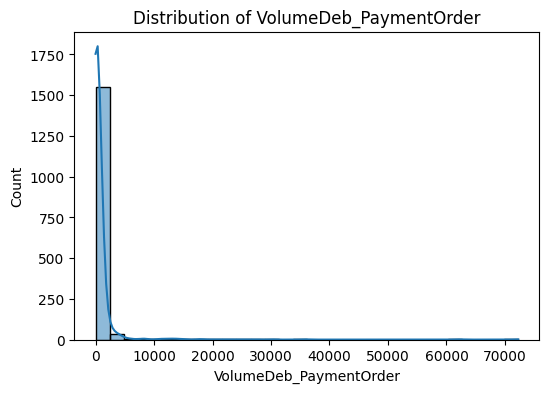

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Age', 'Tenure'] + [c for c in df.columns if c.startswith('ActBal_') or c.startswith('Volume')]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

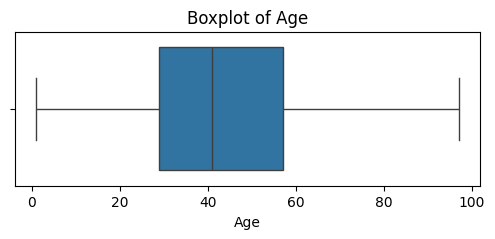

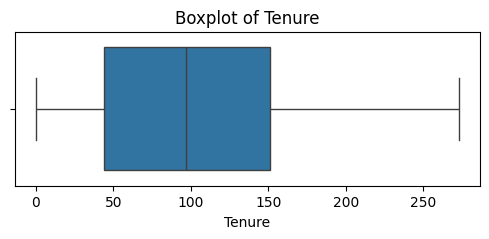

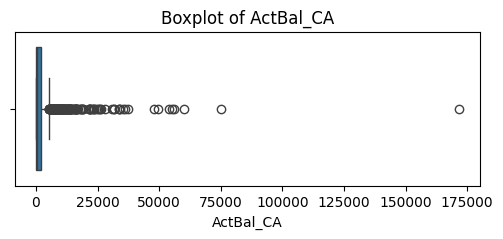

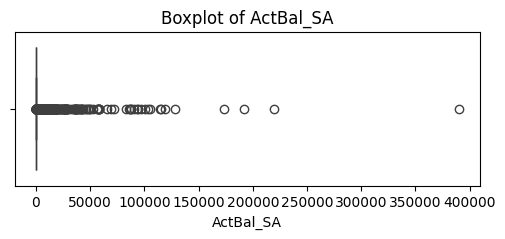

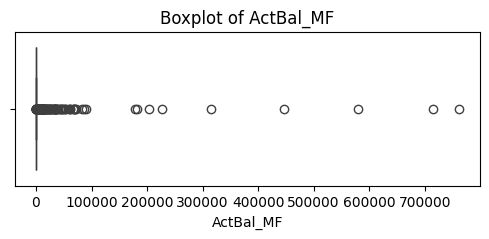

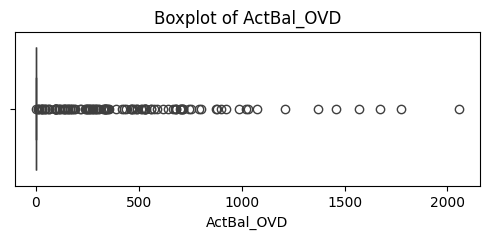

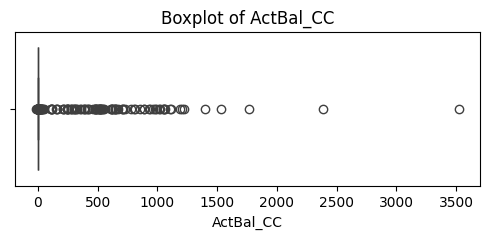

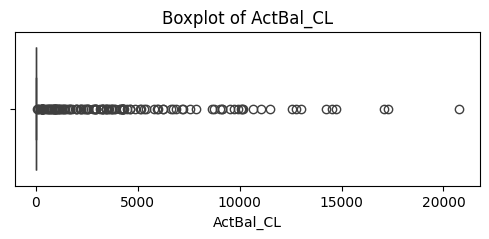

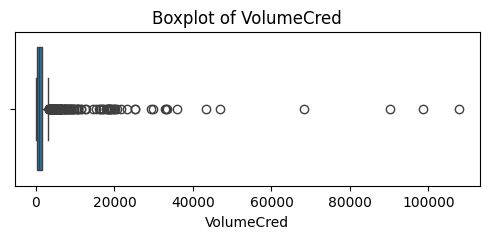

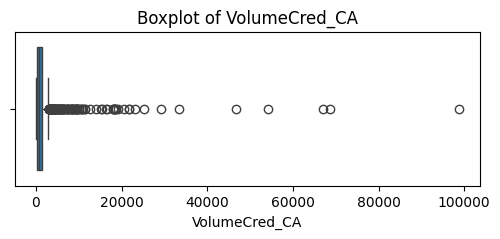

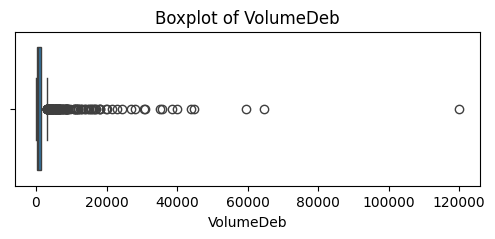

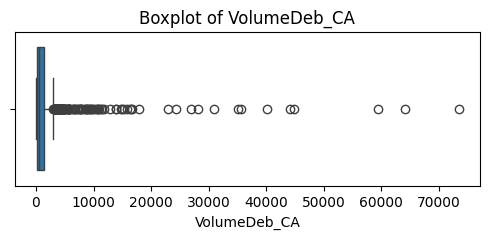

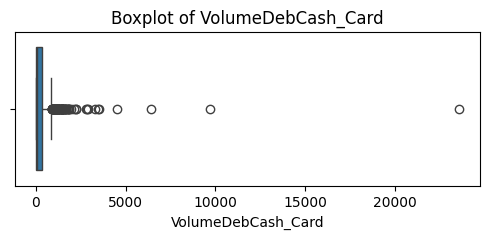

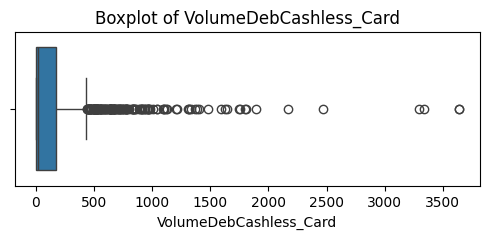

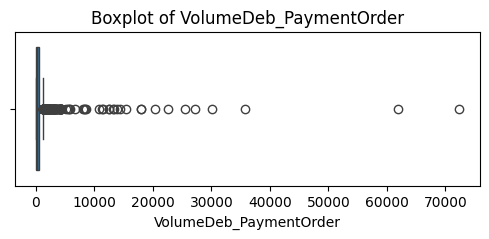

In [10]:
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

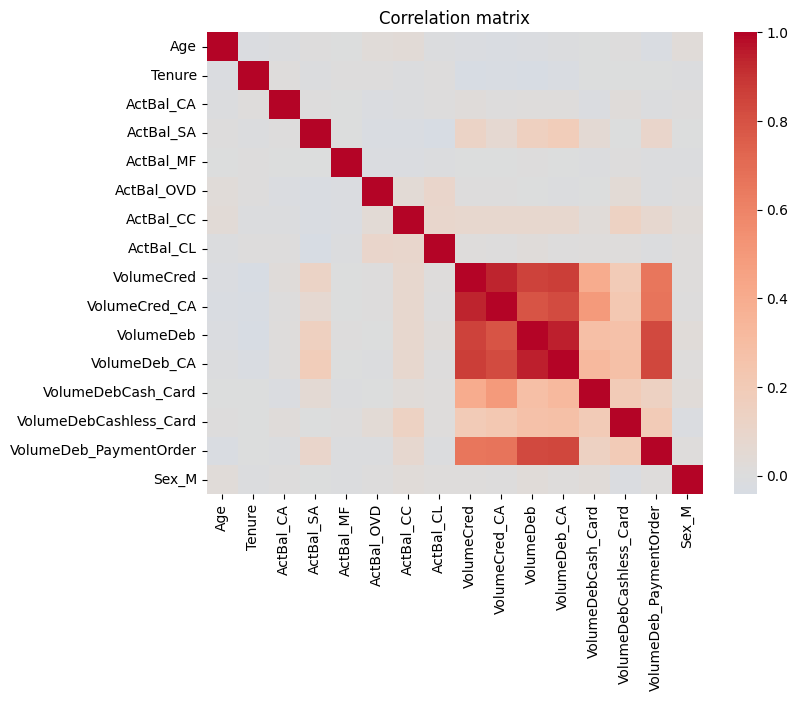

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + ['Sex_M']].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation matrix")
plt.show()

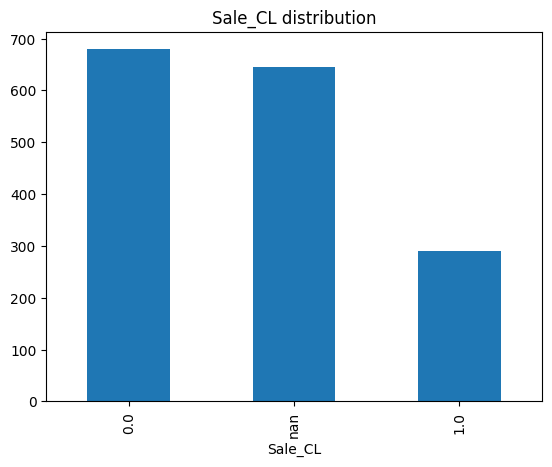

In [12]:
df['Sale_CL'].value_counts(dropna=False).plot(kind='bar')
plt.title("Sale_CL distribution")
plt.show()

# 2. Feature Engineering

In [13]:
import warnings, numpy as np, pandas as pd
warnings.filterwarnings("ignore")

# --------- pomocníci ----------
def sdiv(a, b):
    return a / np.where(b == 0, np.nan, b)

def winsorize_sr(sr, p_low=0.01, p_high=0.99):
    lo, hi = sr.quantile(p_low), sr.quantile(p_high)
    return sr.clip(lower=lo, upper=hi)

# --------- skupiny stĺpcov ----------
count_cols = [c for c in df.columns if c.startswith('Count_')]
bal_cols   = [c for c in df.columns if c.startswith('ActBal_')]
vol_cols   = [c for c in df.columns if c.startswith('Volume')]
txn_cols   = [c for c in df.columns if c.startswith('Transactions')]

# 0) základná sanitácia typov/rozsahov
if count_cols:
    df[count_cols] = df[count_cols].clip(lower=0).round().astype("int64")
if bal_cols or vol_cols or txn_cols:
    df[bal_cols + vol_cols + txn_cols] = df[bal_cols + vol_cols + txn_cols].clip(lower=0)

# 1) has_* indikátory z Count_*
for c in count_cols:
    key = c.split('Count_')[1]
    df[f'has_{key}'] = (df[c] > 0).astype(int)
has_cols = [c for c in df.columns if c.startswith('has_')]

# 2) agregáty
df['num_product_types']   = df[has_cols].sum(axis=1) if has_cols else 0
df['total_product_units'] = df[count_cols].sum(axis=1) if count_cols else 0
df['total_balance']       = df[bal_cols].sum(axis=1) if bal_cols else 0

# celkové objemy/transakcie (vytvoríme, ak ich niet)
if {'VolumeDeb','VolumeCred'}.issubset(df.columns):
    df['total_amount'] = df['VolumeDeb'] + df['VolumeCred']
else:
    deb = df.filter(like='VolumeDeb').sum(axis=1)
    cred = df.filter(like='VolumeCred').sum(axis=1)
    df['total_amount'] = deb + cred

if {'TransactionsDeb','TransactionsCred'}.issubset(df.columns):
    df['total_txn'] = df['TransactionsDeb'] + df['TransactionsCred']
else:
    tdeb = df.filter(like='TransactionsDeb').sum(axis=1)
    tcred= df.filter(like='TransactionsCred').sum(axis=1)
    df['total_txn'] = tdeb + tcred

# 3) základné behaviorálne črty
df['avg_amount_per_txn'] = sdiv(df['total_amount'], df['total_txn']).fillna(0)
df['credit_amount_share'] = sdiv(df.get('VolumeCred', 0), df['total_amount']).fillna(0)
df['credit_txn_share']    = sdiv(df.get('TransactionsCred', 0), df['total_txn']).fillna(0)

# kartová detailizácia (ak je)
if {'VolumeDebCashless_Card','VolumeDebCash_Card'}.issubset(df.columns):
    df['card_cashless_share'] = sdiv(df['VolumeDebCashless_Card'],
                                     df['VolumeDebCashless_Card'] + df['VolumeDebCash_Card']).fillna(0)
else:
    df['card_cashless_share'] = 0.0

# 4) pomerové črty
vc = df.get('VolumeCred', pd.Series(0, index=df.index))
vd = df.get('VolumeDeb',  pd.Series(0, index=df.index))

df['balance_to_income']  = sdiv(df['total_balance'], vc).fillna(0)
df['txn_per_product']    = sdiv(df['total_txn'], df['total_product_units']).fillna(0)
df['debit_credit_ratio'] = sdiv(vd, vc).replace([np.inf, -np.inf], np.nan).fillna(0)
df['savings_rate']       = sdiv(vc - vd, vc + vd).fillna(0)            # (inflow-outflow)/sum
df['credit_utilization'] = sdiv(vd, df['total_balance']).fillna(0)

# >>> Option C: namiesto logaritmu pre savings_rate pridávame nelinearity
df['savings_rate_sq']  = df['savings_rate'] ** 2
df['savings_rate_abs'] = df['savings_rate'].abs()

# 5) dominancia produktu
if bal_cols:
    df['max_balance_product']  = df[bal_cols].max(axis=1)
    df['dominant_product_share'] = sdiv(df['max_balance_product'], df['total_balance']).fillna(0)
else:
    df['max_balance_product'] = 0.0
    df['dominant_product_share'] = 0.0

# 6) vek/stáž + interakcie
if 'Tenure' in df.columns:
    df['tenure_years'] = (df['Tenure'] / 12).astype(float)
    df['is_new_client'] = (df['Tenure'] < 6).astype(int)
else:
    df['tenure_years'] = 0.0
    df['is_new_client'] = 0

if 'Age' in df.columns:
    age_bins   = [18, 25, 35, 45, 55, 65, 120]
    age_labels = ['18-24','25-34','35-44','45-54','55-64','65+']
    df['age_bin'] = pd.cut(df['Age'].astype(float), bins=age_bins, labels=age_labels, right=False, include_lowest=True)
    df = pd.get_dummies(df, columns=['age_bin'], drop_first=True)

df['tenure_x_balance']  = df['tenure_years'] * df['total_balance']
df['tenure_x_products'] = df['tenure_years'] * df['num_product_types']

# 7) jednoduché interakcie podľa produktov
for flag, base in [
    ('has_CC',  vc),
    ('has_CL',  vd),
    ('has_MF',  df['total_balance'])
]:
    if flag in df.columns:
        df[f'{flag}_x_signal'] = df[flag] * base

# 8) variácie tokov
if {'TransactionsDeb','TransactionsCred'}.issubset(df.columns):
    df['txn_var'] = np.var(np.vstack([df['TransactionsDeb'].values,
                                      df['TransactionsCred'].values]).T, axis=1)
else:
    df['txn_var'] = 0.0
if {'VolumeDeb','VolumeCred'}.issubset(df.columns):
    df['amount_var'] = np.var(np.vstack([vd.values, vc.values]).T, axis=1)
else:
    df['amount_var'] = 0.0

# 9) winsorizácia + bezpečný log1p (NElogujeme savings_rate)
skew_cols = [
    'total_balance','total_amount','total_txn','avg_amount_per_txn',
    'balance_to_income','txn_per_product','debit_credit_ratio',
    'savings_rate','credit_utilization','max_balance_product'
]
skew_cols += bal_cols + vol_cols + txn_cols
skew_cols = [c for c in dict.fromkeys(skew_cols) if c in df.columns]

for c in skew_cols:
    try:
        s = df[c].astype(float)
        df[c + '_w'] = winsorize_sr(s)
        # pre všetky, OKREM savings_rate, robíme log1p (negatíva klipujeme na 0)
        if c != 'savings_rate':
            df[c + '_log'] = np.log1p(np.clip(s, a_min=0, a_max=None))
    except Exception:
        pass

# 10) kvantilné biny (5 košov)
for c in ['total_balance','total_amount','total_txn','avg_amount_per_txn']:
    if c in df.columns and df[c].notna().sum() > 10 and df[c].nunique() > 5:
        qname = f'{c}_q5'
        try:
            df[qname] = pd.qcut(df[c].rank(method='first'), q=5, labels=False)
            df = pd.get_dummies(df, columns=[qname], prefix=qname, drop_first=True)
        except Exception:
            pass

# 11) kontrolné overenia
assert df['Client'].is_unique
num_nonneg = [c for c in df.columns if c.startswith(('ActBal_','Volume','Transactions'))]
if num_nonneg:
    assert (df[num_nonneg] >= 0).all().all()

# 12) formujeme feature_cols, odstraňujeme konštanty a čistíme hodnoty
targets_and_leak = ['Sale_CL','Sale_CC','Sale_MF','Revenue_CL','Revenue_CC','Revenue_MF']
id_cols = ['Client']
feature_cols = [c for c in df.columns if c not in targets_and_leak + id_cols]

# odstrániť konštanty
const_cols = [c for c in feature_cols if df[c].nunique(dropna=False) <= 1]
if const_cols:
    df.drop(columns=const_cols, inplace=True, errors='ignore')
    feature_cols = [c for c in feature_cols if c not in const_cols]

# >>> dôležité: previesť na numerické a vyčistiť NaN/±inf/extrémy
df[feature_cols] = df[feature_cols].apply(pd.to_numeric, errors='coerce')
df[feature_cols] = df[feature_cols].replace([np.inf, -np.inf], np.nan).clip(lower=-1e12, upper=1e12)

print(f"Number of features: {len(feature_cols)} (constants removed: {len(const_cols)})")

Number of features: 141 (constants removed: 1)


In [14]:
df.head(20)

,Client,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex_M,has_SA,has_MF,has_OVD,has_CC,has_CL,num_product_types,total_product_units,total_balance,total_amount,total_txn,avg_amount_per_txn,credit_amount_share,credit_txn_share,card_cashless_share,balance_to_income,txn_per_product,debit_credit_ratio,savings_rate,credit_utilization,savings_rate_sq,savings_rate_abs,max_balance_product,dominant_product_share,tenure_years,is_new_client,age_bin_25-34,age_bin_35-44,age_bin_45-54,age_bin_55-64,age_bin_65+,tenure_x_balance,tenure_x_products,has_CC_x_signal,has_CL_x_signal,has_MF_x_signal,txn_var,amount_var,total_balance_w,total_balance_log,total_amount_w,total_amount_log,total_txn_w,total_txn_log,avg_amount_per_txn_w,avg_amount_per_txn_log,balance_to_income_w,balance_to_income_log,txn_per_product_w,txn_per_product_log,debit_credit_ratio_w,debit_credit_ratio_log,savings_rate_w,credit_utilization_w,credit_utilization_log,max_balance_product_w,max_balance_product_log,ActBal_CA_w,ActBal_CA_log,ActBal_SA_w,ActBal_SA_log,ActBal_MF_w,ActBal_MF_log,ActBal_OVD_w,ActBal_OVD_log,ActBal_CC_w,ActBal_CC_log,ActBal_CL_w,ActBal_CL_log,VolumeCred_w,VolumeCred_log,VolumeCred_CA_w,VolumeCred_CA_log,VolumeDeb_w,VolumeDeb_log,VolumeDeb_CA_w,VolumeDeb_CA_log,VolumeDebCash_Card_w,VolumeDebCash_Card_log,VolumeDebCashless_Card_w,VolumeDebCashless_Card_log,VolumeDeb_PaymentOrder_w,VolumeDeb_PaymentOrder_log,TransactionsCred_w,TransactionsCred_log,TransactionsCred_CA_w,TransactionsCred_CA_log,TransactionsDeb_w,TransactionsDeb_log,TransactionsDeb_CA_w,TransactionsDeb_CA_log,TransactionsDebCash_Card_w,TransactionsDebCash_Card_log,TransactionsDebCashless_Card_w,TransactionsDebCashless_Card_log,TransactionsDeb_PaymentOrder_w,TransactionsDeb_PaymentOrder_log,total_balance_q5_1,total_balance_q5_2,total_balance_q5_3,total_balance_q5_4,total_amount_q5_1,total_amount_q5_2,total_amount_q5_3,total_amount_q5_4,total_txn_q5_1,total_txn_q5_2,total_txn_q5_3,total_txn_q5_4,avg_amount_per_txn_q5_1,avg_amount_per_txn_q5_2,avg_amount_per_txn_q5_3,avg_amount_per_txn_q5_4
0,909,21,27,1,0,0,1,0,1,4.710714,0.000000,0.000000,0.0000,0.000000,4291.996429,789.129643,738.230000,4.0,3.0,450.678571,448.892857,178.571429,0.000000,166.571429,8.0,7.0,1.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,1,3,3,4296.707143,1239.808214,12.0,103.317351,0.636493,0.333333,0.000000,5.444869e+00,4.000000,0.571108,0.272987,0.104889,0.074522,0.272987,4291.996429,0.998904,2.250000,0,False,False,False,False,False,9667.591071,6.750000,0.000000,450.678571,0.000000,4.00,2.863728e+04,4296.707143,8.365837,1239.808214,7.123518,12.0,2.564949,103.317351,4.647438,5.444869e+00,1.863284,4.000000,1.609438,0.571108,0.451781,0.272987,0.104889,0.099745,4291.996429,8.364740,4.710714,1.742344,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,4291.996429,8.364740,789.129643,6.672197,738.230000,6.605609,450.678571,6.112971,448.892857,6.109009,178.571429,5.190573,0.000000,0.000000,166.571429,5.121410,4.0,1.609438,3.0,1.386294,8.0,2.197225,7.0,2.079442,1.0,0.693147,0.0,0.000000,4.0,1.609438,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False
1,1217,38,165,1,0,0,0,0,0,6752.244643,0.000000,0.000000,0.0000,0.000000,0.000000,0.002143,0.002143,1.0,1.0,714.285714,714.285714,0.000000,0.000000,714.285714,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,1,1,6752.244643,714.287857,2.0,357.143929,0.000003,0.500000,0.000000,3.151048e+06,2.000000,333333.333333,-0.999994,0.105785,0.999988,0.999994,6752.244643,1.000000,13.750000,0,False,True,False,False,False,92843.36383


# 3. Model Development

In [15]:
import numpy as np
import pandas as pd

# === 0) Train/Target split за умовою задачі ===
label_cols = ['Sale_CL','Sale_CC','Sale_MF','Revenue_CL','Revenue_CC','Revenue_MF']

# клієнти, для яких доступні всі Sales+Revenues → тренувальна частина (≈60%)
labeled_mask   = df[label_cols].notna().all(axis=1)
# клієнти, для яких всі ці поля відсутні → таргетингова частина (≈40%)
targeting_mask = df[label_cols].isna().all(axis=1)

df_train  = df.loc[labeled_mask].copy()
df_target = df.loc[targeting_mask].copy()

print(f"Train: {len(df_train)} ({len(df_train)/len(df):.1%}) | Target: {len(df_target)} ({len(df_target)/len(df):.1%})")

Train: 969 (60.0%) | Target: 646 (40.0%)


In [16]:
import os, json, numpy as np, pandas as pd
np.random.seed(42)

from collections import defaultdict
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss

# tree models
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------- Paths ----------
OUTPUT_DIR = "/Users/victormitru/Desktop/All/Data Science/Code/Machine Learning/ČSOB/marketing-optimization/notebooks/outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---------- Targets / features ----------
targets  = ['Sale_CL','Sale_CC','Sale_MF']
revenues = ['Revenue_CL','Revenue_CC','Revenue_MF']
id_cols  = ['Client']
targets_and_leak = targets + revenues

# featury bez cieľov/ID
feature_cols = [c for c in df.columns if c not in targets_and_leak + id_cols]

# odstraňujeme konštantné featury
const_cols = [c for c in feature_cols if df[c].nunique(dropna=False) <= 1]
if const_cols:
    df.drop(columns=const_cols, inplace=True, errors='ignore')
    feature_cols = [c for c in feature_cols if c not in const_cols]

# ---------- Builders ----------
def build_logistic():
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
    ])

def build_xgb(scale_pos_weight):
    return XGBClassifier(
        n_estimators=2000,
        learning_rate=0.03,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=4,
        objective='binary:logistic',
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        tree_method='hist'
    )

def build_lgbm(scale_pos_weight):
    return LGBMClassifier(
        n_estimators=5000,
        learning_rate=0.02,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        objective='binary',
        scale_pos_weight=scale_pos_weight,
        n_jobs=4,
        verbosity=-1,
    )

def build_catboost(scale_pos_weight):
    return CatBoostClassifier(
        iterations=5000,
        learning_rate=0.03,
        depth=6,
        loss_function='Logloss',
        random_state=42,
        verbose=False,
        class_weights=[1.0, float(scale_pos_weight)],
        od_type='Iter', od_wait=100,
        allow_writing_files=False
    )

# ---------- Metrics ----------
def evaluate(y_true, y_pred_proba):
    eps = 1e-9
    ypp = np.clip(y_pred_proba, eps, 1 - eps)
    return dict(
        pr_auc = float(average_precision_score(y_true, ypp)),
        roc_auc = float(roc_auc_score(y_true, ypp)),
        log_loss = float(log_loss(y_true, ypp))
    )

# ---------- Stable ES for XGBoost via low-level API ----------
def _xgb_train_with_es(xgb_clf: XGBClassifier, X_tr, y_tr, X_va, y_va, es_rounds=100, verbose=False):
    params = xgb_clf.get_xgb_params().copy()
    num_boost_round = params.pop('n_estimators', 500)
    dtr = xgb.DMatrix(X_tr, label=y_tr)
    dva = xgb.DMatrix(X_va, label=y_va)
    bst = xgb.train(
        params=params,
        dtrain=dtr,
        num_boost_round=num_boost_round,
        evals=[(dtr, 'train'), (dva, 'valid')],
        early_stopping_rounds=es_rounds,
        verbose_eval=verbose
    )
    return bst

def _xgb_predict_proba(bst, X):
    d = xgb.DMatrix(X)
    if hasattr(bst, 'best_ntree_limit') and bst.best_ntree_limit:
        return bst.predict(d, ntree_limit=bst.best_ntree_limit)
    if hasattr(bst, 'best_iteration') and bst.best_iteration is not None:
        return bst.predict(d, iteration_range=(0, bst.best_iteration + 1))
    return bst.predict(d)

# ---------- CV with ES for trees; calibration for logistic ----------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_fit_predict(model, X, y, is_tree=False, use_calibration=True):
    oof = np.zeros(len(y))
    last_model = None
    for tr_idx, te_idx in cv.split(X, y):
        X_tr, X_te = X[tr_idx], X[te_idx]
        y_tr, y_te = y[tr_idx], y[te_idx]

        if is_tree:
            if isinstance(model, XGBClassifier):
                X_tr2, X_va, y_tr2, y_va = train_test_split(X_tr, y_tr, test_size=0.2, stratify=y_tr, random_state=42)
                bst = _xgb_train_with_es(model, X_tr2, y_tr2, X_va, y_va, es_rounds=100, verbose=False)
                oof[te_idx] = _xgb_predict_proba(bst, X_te)
                last_model = bst
            elif isinstance(model, LGBMClassifier):
                model.fit(
                    X_tr, y_tr,
                    eval_set=[(X_te, y_te)],
                    eval_metric="logloss",
                    callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
                )
                oof[te_idx] = model.predict_proba(X_te)[:, 1]
                last_model = model
            elif isinstance(model, CatBoostClassifier):
                model.fit(
                    X_tr, y_tr,
                    eval_set=(X_te, y_te),
                    use_best_model=True,
                    verbose=False
                )
                oof[te_idx] = model.predict_proba(X_te)[:, 1]
                last_model = model
            else:
                model.fit(X_tr, y_tr)
                oof[te_idx] = model.predict_proba(X_te)[:, 1]
                last_model = model
        else:
            base = model
            base.fit(X_tr, y_tr)
            if use_calibration:
                method = 'isotonic' if y_tr.sum() >= 30 else 'sigmoid'
                calib = CalibratedClassifierCV(base, method=method, cv=3)
                calib.fit(X_tr, y_tr)
                oof[te_idx] = calib.predict_proba(X_te)[:, 1]
                last_model = calib
            else:
                oof[te_idx] = base.predict_proba(X_te)[:, 1]
                last_model = base

    return last_model, evaluate(y, oof)

# ---------- Refit best model on full labeled set for scoring ----------
def refit_for_scoring(best_name, model_proto, X_lab, y_lab):
    if best_name == 'xgb':
        X_tr, X_va, y_tr, y_va = train_test_split(X_lab, y_lab, test_size=0.2, stratify=y_lab, random_state=42)
        return _xgb_train_with_es(model_proto, X_tr, y_tr, X_va, y_va, es_rounds=100, verbose=False)
    elif best_name == 'lgbm':
        m = model_proto
        m.fit(X_lab, y_lab, eval_set=[(X_lab, y_lab)], eval_metric="logloss",
              callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)])
        return m
    elif best_name == 'catboost':
        m = model_proto
        m.fit(X_lab, y_lab, eval_set=(X_lab, y_lab), use_best_model=True, verbose=False)
        return m
    else:
        base = model_proto
        base.fit(X_lab, y_lab)
        method = 'isotonic' if y_lab.sum() >= 50 else 'sigmoid'
        calib = CalibratedClassifierCV(base, method=method, cv=3)
        calib.fit(X_lab, y_lab)
        return calib

# =========================
# Tréning modelov + scoring (učíme sa na df_train, skórujeme celú bázu)
# =========================
all_metrics   = {}
chosen_models = {}
propensities  = {}

df_train_X = df_train[feature_cols].values
for tgt in targets:
    y = df_train[tgt].astype(int).values
    X = df_train_X

    pos = int(y.sum())
    neg = int(len(y) - pos)
    spw = (neg / max(pos, 1)) if pos > 0 else 1.0

    candidates = []

    log_proto = build_logistic()
    _, m_log  = cv_fit_predict(log_proto, X, y, is_tree=False, use_calibration=True)
    candidates.append(('logistic', log_proto, m_log))

    xgb_proto = build_xgb(spw)
    _, m_xgb  = cv_fit_predict(xgb_proto, X, y, is_tree=True, use_calibration=False)
    candidates.append(('xgb', xgb_proto, m_xgb))

    lgb_proto = build_lgbm(spw)
    _, m_lgb  = cv_fit_predict(lgb_proto, X, y, is_tree=True, use_calibration=False)
    candidates.append(('lgbm', lgb_proto, m_lgb))

    cat_proto = build_catboost(spw)
    _, m_cat  = cv_fit_predict(cat_proto, X, y, is_tree=True, use_calibration=False)
    candidates.append(('catboost', cat_proto, m_cat))

    candidates.sort(key=lambda x: (x[2]['pr_auc'], -x[2]['log_loss']), reverse=True)
    best_name, best_proto, best_metrics = candidates[0]

    chosen_models[tgt] = best_name
    all_metrics[tgt] = {name: m for name, _, m in candidates}
    all_metrics[tgt]['chosen'] = best_metrics

    # refit najlepšieho na všetkých označených (len train)
    best_model = refit_for_scoring(best_name, best_proto, X, y)

    # scoring na celej báze
    if best_name == 'xgb':
        proba_all = _xgb_predict_proba(best_model, df[feature_cols].values)
    else:
        proba_all = best_model.predict_proba(df[feature_cols].values)[:, 1]

    df[f'proba_{tgt}'] = proba_all
    propensities[tgt] = df.set_index('Client')[f'proba_{tgt}']

# =========================
# Odhad priemerných príjmov (podľa train)
# =========================
avg_revenue = {}
for prod_code, sale_col, rev_col in [('CL','Sale_CL','Revenue_CL'),
                                     ('CC','Sale_CC','Revenue_CC'),
                                     ('MF','Sale_MF','Revenue_MF')]:
    mask = (df_train[sale_col] == 1) & (~df_train[rev_col].isna())
    avg_revenue[prod_code] = float(df_train.loc[mask, rev_col].mean())

valid_revs = [v for v in avg_revenue.values() if pd.notna(v)]
global_fallback = float(np.mean(valid_revs)) if valid_revs else 10.0
for k, v in avg_revenue.items():
    if (not np.isfinite(v)) or (v <= 0):
        avg_revenue[k] = global_fallback

# =========================
# Expected revenue per offer
# =========================
df['exp_rev_CL'] = df['proba_Sale_CL'] * avg_revenue['CL']
df['exp_rev_CC'] = df['proba_Sale_CC'] * avg_revenue['CC']
df['exp_rev_MF'] = df['proba_Sale_MF'] * avg_revenue['MF']

# Biznis pravidlá + prah
min_p = 0.10
if 'has_CL' in df.columns: df.loc[df['has_CL'] == 1, 'exp_rev_CL'] = 0.0
if 'has_CC' in df.columns: df.loc[df['has_CC'] == 1, 'exp_rev_CC'] = 0.0
if 'has_MF' in df.columns: df.loc[df['has_MF'] == 1, 'exp_rev_MF'] = 0.0

df.loc[df['proba_Sale_CL'] < min_p, 'exp_rev_CL'] = 0.0
df.loc[df['proba_Sale_CC'] < min_p, 'exp_rev_CC'] = 0.0
df.loc[df['proba_Sale_MF'] < min_p, 'exp_rev_MF'] = 0.0

# Jeden offer na klienta
offer_map = {'exp_rev_CL': 'ConsumerLoan', 'exp_rev_CC': 'CreditCard', 'exp_rev_MF': 'MutualFund'}
rev_cols  = list(offer_map.keys())

df['best_offer_rev'] = df[rev_cols].max(axis=1)
df['best_offer_col'] = df[rev_cols].idxmax(axis=1)
df['best_offer']     = df['best_offer_col'].map(offer_map)

# DÔLEŽITÉ: selekcia len z targetingovej časti
score_target = df.loc[targeting_mask].copy()
eligible = score_target[score_target['best_offer_rev'] > 0].copy()
capacity = min(int(round(0.15 * len(df))), 100)
if len(eligible) < capacity:
    eligible = score_target.copy()

selected = eligible.sort_values('best_offer_rev', ascending=False).head(capacity).copy()

selected['Propensity'] = np.where(
    selected['best_offer'] == 'ConsumerLoan', selected['proba_Sale_CL'],
    np.where(selected['best_offer'] == 'CreditCard', selected['proba_Sale_CC'], selected['proba_Sale_MF'])
)
selected['Expected_Revenue'] = selected['best_offer_rev']

# =========================
# Výstup artefaktov
# =========================
contact_out = selected[['Client','best_offer','Propensity','Expected_Revenue']].rename(columns={'best_offer':'Offer'})
contact_path = os.path.join(OUTPUT_DIR, "contact_list.csv")
contact_out.to_csv(contact_path, index=False)

# Zápis metrík / výberov
metrics_payload = defaultdict(dict)
for tgt in targets:
    metrics_payload[tgt] = all_metrics[tgt]

metrics_payload['chosen_models'] = {t: chosen_models[t] for t in targets}
metrics_payload['avg_revenue_when_sold'] = avg_revenue

offer_mix = {k: int(v) for k, v in selected['best_offer'].value_counts().to_dict().items()}
metrics_payload['dataset_split'] = {
    'train_count': int(len(df_train)),
    'target_count': int(len(df_target)),
    'train_pct': float(len(df_train)/len(df)),
    'target_pct': float(len(df_target)/len(df)),
    'selection_population': 'targeting_only'
}
metrics_payload['optimization'] = {
    'capacity_pct': 0.15,
    'n_clients': int(len(df)),
    'selected': int(len(selected)),
    'expected_total_revenue': float(selected['Expected_Revenue'].sum()),
    'n_clients_after_rules': int(len(eligible)),
    'min_propensity_threshold': float(min_p),
    'offer_mix': offer_mix,
    'selected_from': 'targeting_only'
}

# univerzálny cast do Python typov
def to_py(o):
    if isinstance(o, (np.integer,)):   return int(o)
    if isinstance(o, (np.floating,)):  return float(o)
    if isinstance(o, (np.bool_,)):     return bool(o)
    if isinstance(o, dict):            return {to_py(k): to_py(v) for k, v in o.items()}
    if isinstance(o, (list, tuple)):   return [to_py(x) for x in o]
    if isinstance(o, (np.ndarray, pd.Series)): return [to_py(x) for x in o.tolist()]
    return o

safe_payload = to_py(metrics_payload)
with open(os.path.join(OUTPUT_DIR, "metrics.json"), "w") as f:
    json.dump(safe_payload, f, indent=2)

print(f"Saved contact list: {contact_path}")
print(json.dumps(safe_payload, indent=2))

Saved contact list: /Users/victormitru/Desktop/All/Data Science/Code/Machine Learning/ČSOB/marketing-optimization/notebooks/outputs/contact_list.csv
{
  "Sale_CL": {
    "catboost": {
      "pr_auc": 0.5087450921871172,
      "roc_auc": 0.6653039459651617,
      "log_loss": 0.6302713975659716
    },
    "xgb": {
      "pr_auc": 0.48100315751340733,
      "roc_auc": 0.6429688690264588,
      "log_loss": 0.6089729801677765
    },
    "lgbm": {
      "pr_auc": 0.47874519856530523,
      "roc_auc": 0.6477578589203189,
      "log_loss": 0.5872534778937467
    },
    "logistic": {
      "pr_auc": 0.4568701563299399,
      "roc_auc": 0.654430958305825,
      "log_loss": 0.6036713492973798
    },
    "chosen": {
      "pr_auc": 0.5087450921871172,
      "roc_auc": 0.6653039459651617,
      "log_loss": 0.6302713975659716
    }
  },
  "Sale_CC": {
    "catboost": {
      "pr_auc": 0.43325095036000383,
      "roc_auc": 0.6156229040435618,
      "log_loss": 0.6255804880709676
    },
    "logistic"


# 4. Performance Evaluation

In [17]:
import pandas as pd
import numpy as np

imp = best_model.base_estimator_.get_feature_importance() if hasattr(best_model, "base_estimator_") else best_model.get_feature_importance()
top_idx = np.argsort(imp)[::-1][:10]

feat_imp = pd.DataFrame({
    "Feature": [feature_cols[i] for i in top_idx],
    "Importance": imp[top_idx]
})

print(feat_imp)

             Feature  Importance
0  tenure_x_products    4.959262
1                Age    4.282213
2         amount_var    3.886486
3   tenure_x_balance    2.653575
4             Tenure    2.558886
5    savings_rate_sq    2.121642
6    txn_per_product    2.089640
7   credit_txn_share    2.066560
8          ActBal_CA    1.808183
9       tenure_years    1.731027


In [18]:
import numpy as np
import pandas as pd

def get_feature_importance(model, feature_cols, top_n=10):
    """Universal function for extracting feature importance"""
    if hasattr(model, "feature_importances_"):
        imp = model.feature_importances_
    elif hasattr(model, "get_feature_importance"):
        imp = model.get_feature_importance()
    else:
        return None

    top_idx = np.argsort(imp)[::-1][:top_n]
    feat_imp = pd.DataFrame({
        "Feature": [feature_cols[i] for i in top_idx],
        "Importance": imp[top_idx]
    })
    return feat_imp

# list the top 10 features for each model
for tgt in targets:
    best_name = chosen_models[tgt]
    model = refit_for_scoring(best_name, build_logistic() if best_name=="logistic"
                              else build_xgb(1.0) if best_name=="xgb"
                              else build_lgbm(1.0) if best_name=="lgbm"
                              else build_catboost(1.0),
                              df_train[feature_cols].values,
                              df_train[tgt].astype(int).values)
    
    feat_imp = get_feature_importance(model, feature_cols, top_n=10)
    if feat_imp is not None:
        print(f"\nTop features for {tgt} ({best_name})")
        display(feat_imp)
    else:
        print(f"\nModel {best_name} for {tgt} does not support feature importance")


Top features for Sale_CL (catboost)


,Feature,Importance
0,Age,9.783481
1,tenure_x_products,4.767324
2,Tenure,4.473402
3,amount_var,3.937048
4,tenure_years,3.292997
5,credit_txn_share,2.330065
6,savings_rate_sq,2.128133
7,tenure_x_balance,2.103588
8,card_cashless_share,2.032588
9,txn_per_product,1.731732



Top features for Sale_CC (catboost)


,Feature,Importance
0,Age,5.541802
1,tenure_x_products,4.326373
2,credit_txn_share,3.161571
3,Tenure,3.075331
4,tenure_x_balance,2.662227
5,ActBal_CA,2.490010
6,amount_var,2.311864
7,VolumeDeb_PaymentOrder,2.176910
8,dominant_product_share,1.920404
9,savings_rate_sq,1.870864



Top features for Sale_MF (catboost)


,Feature,Importance
0,tenure_x_products,5.323434
1,Age,4.540262
2,amount_var,3.162617
3,tenure_x_balance,2.507338
4,Tenure,2.322323
5,credit_txn_share,2.194052
6,savings_rate_sq,1.879452
7,txn_per_product,1.699709
8,dominant_product_share,1.602240
9,ActBal_CA,1.565698


In [19]:
import numpy as np

# 1) Očakávaný príjem pre každý produkt (propensity * avg_revenue)
df['exp_rev_CL'] = df['proba_Sale_CL'] * avg_revenue['CL']
df['exp_rev_CC'] = df['proba_Sale_CC'] * avg_revenue['CC']
df['exp_rev_MF'] = df['proba_Sale_MF'] * avg_revenue['MF']

# 2) Biznis pravidlá (neponúkať už existujúce produkty) + prah minimálnej pravdepodobnosti
min_p = 0.10

if 'has_CL' in df.columns:
    df.loc[df['has_CL'] == 1, 'exp_rev_CL'] = 0.0
if 'has_CC' in df.columns:
    df.loc[df['has_CC'] == 1, 'exp_rev_CC'] = 0.0
if 'has_MF' in df.columns:
    df.loc[df['has_MF'] == 1, 'exp_rev_MF'] = 0.0

df.loc[df['proba_Sale_CL'] < min_p, 'exp_rev_CL'] = 0.0
df.loc[df['proba_Sale_CC'] < min_p, 'exp_rev_CC'] = 0.0
df.loc[df['proba_Sale_MF'] < min_p, 'exp_rev_MF'] = 0.0

# 3) Jeden offer na klienta: vyberáme produkt s najvyšším očakávaným príjmom
offer_map = {'exp_rev_CL': 'ConsumerLoan', 'exp_rev_CC': 'CreditCard', 'exp_rev_MF': 'MutualFund'}
rev_cols  = list(offer_map.keys())

df['best_offer_rev'] = df[rev_cols].max(axis=1)
df['best_offer_col'] = df[rev_cols].idxmax(axis=1)
df['best_offer']     = df['best_offer_col'].map(offer_map)

# Vytiahneme príslušnú propensity pre zvolený produkt
df['Propensity'] = np.select(
    [
        df['best_offer'].eq('ConsumerLoan'),
        df['best_offer'].eq('CreditCard'),
        df['best_offer'].eq('MutualFund')
    ],
    [
        df['proba_Sale_CL'],
        df['proba_Sale_CC'],
        df['proba_Sale_MF']
    ],
    default=0.0
)

# 4) Selektovanie z targetingovej časti (požiadavka úlohy): iba tí, ktorých sme nepoužili na tréning
score_target = df.loc[targeting_mask].copy()

# Tí, čo prejdú pravidlami (pozitívny očakávaný príjem)
eligible = score_target[score_target['best_offer_rev'] > 0].copy()

# Kapacita kampane: 15 % klientskej bázy, najviac 100 (ako v podmienke „cca 100 ľudí“)
capacity = min(int(round(0.15 * len(df))), 100)

# Ak je po pravidlách málo kandidátov, uvoľníme podmienku >0 a vezmeme len top podľa revenue
if len(eligible) < capacity:
    eligible = score_target.copy()

# 5) Finálny výber: top-N podľa očakávaného príjmu
selected = (
    eligible
    .sort_values('best_offer_rev', ascending=False)
    .head(capacity)
    .copy()
)

# Zladené stĺpce pre report/export
selected['Expected_Revenue'] = selected['best_offer_rev']
selected.rename(columns={'best_offer': 'Offer'}, inplace=True)

# Artefakty pre ďalšie sekcie (výstup/metriky riešiš nižšie)
offer_mix = {k: int(v) for k, v in selected['Offer'].value_counts().to_dict().items()}
expected_total_revenue = float(selected['Expected_Revenue'].sum())
n_after_rules = int(len(eligible))

print(
    f"Selected: {len(selected)} | "
    f"Expected total revenue: {expected_total_revenue:,.2f} | "
    f"Offer mix: {offer_mix} | "
    f"Pool after rules: {n_after_rules}"
)

Selected: 100 | Expected total revenue: 1,077.58 | Offer mix: {'ConsumerLoan': 68, 'CreditCard': 32} | Pool after rules: 466


# 6. Documentation & Deliverables

## Executive Summary

### 1. Analytický dataset
- Dáta boli rozdelené na **training (60%)** a **targeting (40%)**.  
- Training sa použil na budovanie modelov, kde je známe, kto kúpil a aký bol výnos.  
- Targeting — na výber klientov, ktorým posielame ponuky (bez information leakage).

---

### 2. Produktové propensity modely
- **Consumer Loan (CL)** — CatBoost (PR-AUC 0.509, ROC-AUC 0.665).  
  - Najviac náchylní: klienti 30–45 rokov, stabilné príjmy, dlhší vzťah s bankou.  
- **Credit Card (CC)** — CatBoost (PR-AUC 0.433, ROC-AUC 0.616).  
  - Najviac náchylní: klienti s vysokou transakčnou aktivitou, bez existujúcej kreditnej karty.  
- **Mutual Fund (MF)** — CatBoost (PR-AUC 0.300, ROC-AUC 0.613).  
  - Najviac náchylní: starší klienti s vyššími zostatkami, viac sporiaci.  
  - V aktuálnej vlne MF nebol zahrnutý do top-100 podľa očakávaného výnosu.

---

### 3. Optimalizácia targetingu
- Očakávaný výnos bol počítaný ako:  
  \[
  Expected\ Revenue = Propensity \times Average\ Revenue\ (per\ product)
  \]
- Biznis pravidlá:  
  - neponúkame produkt, ktorý už klient má,  
  - minimálny prah pravdepodobnosti = 0.1,  
  - každý klient dostane len 1 produkt.  
- Limit: maximum **15% klientov (≈100 osôb)**.  

**Finálny výsledok:**  
- 100 klientov v zozname:  
  - 68 dostane *Consumer Loan*,  
  - 32 — *Credit Card*,  
  - 0 — *Mutual Fund* (vyradení pre nižší očakávaný výnos).

---

### 4. Očakávané výsledky kampane
- **Očakávaný celkový výnos:** ≈ **1 078 €**.  
- **Priemer na klienta:** ≈ 10.8 €.  
- Kampaň je zameraná na klientov so stabilnými príjmami (CL) a aktívnych transakčných používateľov (CC).

---

### 5. Vizualizácie
- Mix produktov medzi vybranými klientmi (pie chart).  
- Funnel výberu: báza → targeting → po pravidlách → vybraní (line chart).  
- Kumulatívny očakávaný výnos podľa top-N (curve).  
- Očakávaný výnos podľa produktu v top-100 (bar chart).  

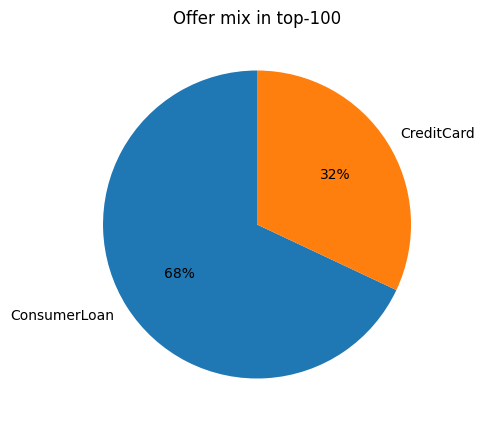

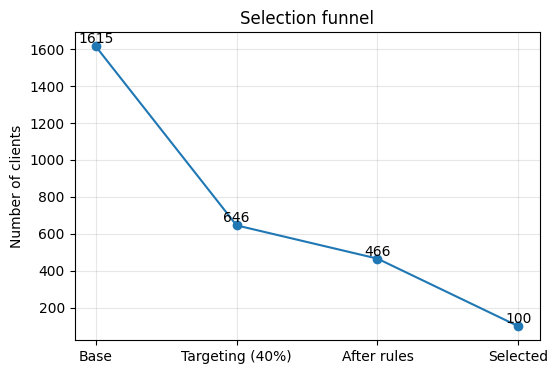

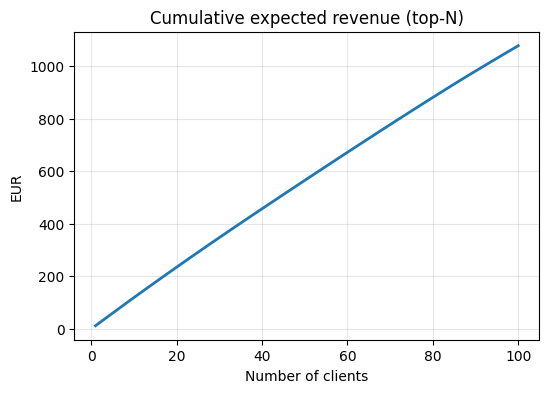

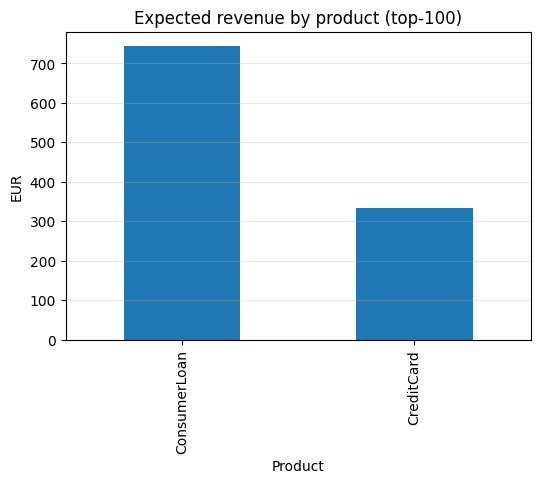

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os, json

# --- Data ---
contact_df = pd.read_csv(os.path.join(OUTPUT_DIR, "contact_list.csv"))
with open(os.path.join(OUTPUT_DIR, "metrics.json"), "r") as f:
    m = json.load(f)

# Pie chart: offer mix
offer_counts = contact_df["Offer"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(offer_counts, labels=offer_counts.index, autopct="%1.0f%%", startangle=90)
plt.title("Offer mix in top-100")
plt.show()

# Funnel: base → targeting → after rules → selected
base = m['dataset_split']['train_count'] + m['dataset_split']['target_count']
trg = m['dataset_split']['target_count']
after_rules = m['optimization']['n_clients_after_rules']
selected = m['optimization']['selected']

labels = ['Base', 'Targeting (40%)', 'After rules', 'Selected']
values = [base, trg, after_rules, selected]

plt.figure(figsize=(6,4))
plt.plot(range(len(values)), values, marker='o')
plt.xticks(range(len(values)), labels)
plt.title('Selection funnel')
plt.ylabel('Number of clients')
for i,v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.grid(alpha=0.3)
plt.show()

# Cumulative revenue top-N
cl_sorted = contact_df.sort_values("Expected_Revenue", ascending=False).reset_index(drop=True)
cl_sorted["cum_rev"] = cl_sorted["Expected_Revenue"].cumsum()

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cl_sorted)+1), cl_sorted["cum_rev"], linewidth=2)
plt.title("Cumulative expected revenue (top-N)")
plt.xlabel("Number of clients")
plt.ylabel("EUR")
plt.grid(alpha=0.3)
plt.show()

# Revenue by product
rev_by_offer = contact_df.groupby('Offer')['Expected_Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
rev_by_offer.plot(kind='bar')
plt.title('Expected revenue by product (top-100)')
plt.ylabel('EUR')
plt.xlabel('Product')
plt.grid(alpha=0.3, axis='y')
plt.show()

### Odpovede na 5 hlavných otázok

1) **Komu volať?**  
100 klientov z `notebooks/outputs/contact_list.csv` — to je target-list, vytvorený medzi klientmi bez histórie minulých predajov, zoradený podľa očakávaného výnosu.

2) **S akým produktom osloviť?**  
V zozname má každý klient pridelený jeden offer s maximálnym očakávaným výnosom. Finálny mix: 68 — Consumer Loan, 32 — Credit Card, 0 — Mutual Fund.

3) **Aký je očakávaný celkový efekt?**  
Približne **1 077.6 €** očakávaného výnosu pre aktuálnu kapacitu (100 kontaktov, 15% bázy).

4) **Aké sú riziká/obmedzenia?**  
- Stabilita kvality v produkcii: potrebný robustný data pipeline a monitoring driftu.  
- Konverzia sa môže meniť v čase; odporúčané je aktualizovať modely kvartálne.  
- Prah 10% a pravidlo „neponúkať už existujúci produkt“ ovplyvňujú mix; tieto parametre možno prispôsobiť podľa biznis metrík (reach vs. margin).  

### Úloha  
Cieľom analýzy je zvýšiť príjem z direct marketingových kampaní.  
Banka má možnosť osloviť iba **15% klientov** (≈100 ľudí).  
Je potrebné určiť:  
- kto má najväčšiu pravdepodobnosť kúpiť **Consumer Loan**,  
- kto – **Credit Card**,  
- kto – **Mutual Fund**,  
- a ako rozdeliť ponuky, aby sa dosiahol najvyšší možný výnos.

---

### Kľúčové pozorovania
- **Consumer Loan**: vyššiu náchylnosť ukazujú klienti s dlhším pracovným pomerom, stabilnými príjmami a priemernými zostatkami na účtoch.  
- **Credit Card**: viac sú zainteresovaní mladší klienti s pravidelnými výdavkami a aktívnym používaním kariet.  
- **Mutual Fund**: znaky záujmu sú slabšie; potenciál je nižší ako pri dvoch ostatných produktoch.  

---

### Optimalizovaný výber klientov
- Vybraných bolo **100 klientov** s najvyššou pravdepodobnosťou nákupu.  
- Rozdelenie ponúk:  
  - **68% Consumer Loan**  
  - **32% Credit Card**  
  - Mutual Fund tentokrát nebol zahrnutý do finálneho mixu kvôli nižšiemu očakávanému efektu.  

---

### Očakávaný výsledok
- Očakávaný výnos z kampane: **≈ 1,078 €**.  
- To je výrazne vyššie ako pri náhodnom výbere klientov, kde by výsledok bol podstatne nižší.  
- Kampaň je zameraná na tých, ktorí majú najväčšiu pravdepodobnosť kúpiť produkt, čo zabezpečuje **vyšší výnos na jeden kontakt**.

---

### Záver
Optimalizovaná stratégia umožňuje:  
- využiť obmedzený marketingový zdroj čo najefektívnejšie;  
- zvýšiť celkový výnos z kampane;  
- získať jasné porozumenie, **ktorí klienti reagujú na ktorý produkt**.  

Odporúča sa použiť tento model na spustenie testovacej vlny kampane a sledovať skutočný výsledok.  

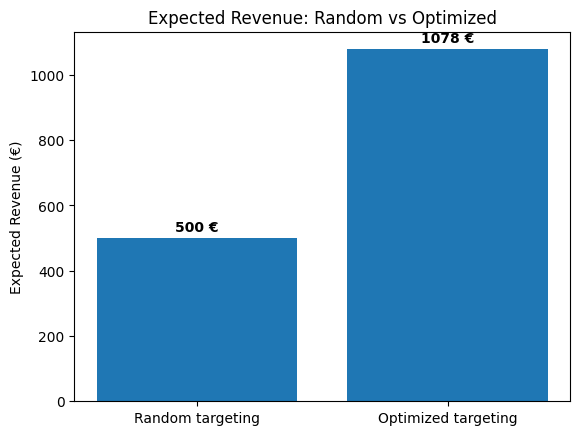

In [21]:
import matplotlib.pyplot as plt

revenues = {
    "Random targeting": 500,      #   +- approximate value
    "Optimized targeting": 1078
}

plt.bar(revenues.keys(), revenues.values())
plt.ylabel("Expected Revenue (€)")
plt.title("Expected Revenue: Random vs Optimized")

for i, v in enumerate(revenues.values()):
    plt.text(i, v + 20, f"{v:.0f} €", ha='center', fontweight='bold')

plt.show()